# Read, transform and visualize input data

In this example, we show how to use the utility functions for loading the sample datasets and plot the data by using the pysteps visualization tools.

## Load the example dataset

Now that we have initialized the notebook, let's import the example MeteoSwiss dataset using the [load_dataset()](https://pysteps.readthedocs.io/en/latest/generated/pysteps.datasets.load_dataset.html) helper function from the `pysteps.datasets` module. The dataset contains radar-derived rain rates from Switzerland. This time series contains 14 elements (i.e. 1 hour and 10 minutes).

In [1]:
from pysteps.datasets import load_dataset
precip, metadata, timestep = load_dataset('mch')

Pysteps configuration file found at: C:\Users\imhof_rn\pysteps\pystepsrc



The load_dataset() function returns the following values:

* precip: a numpy array with (time, y, x) dimensions
* metadata: a dictionary with additional information, see below
* timestep: separation between each sample in the time series (minutes)



Then we can print the metadata using [pprint](https://docs.python.org/3/library/pprint.html).

In [2]:
from pprint import pprint
pprint(metadata)

{'accutime': 5,
 'cartesian_unit': 'm',
 'institution': 'MeteoSwiss',
 'product': 'AQC',
 'projection': '+proj=somerc  +lon_0=7.43958333333333 +lat_0=46.9524055555556 '
               '+k_0=1 +x_0=600000 +y_0=200000 +ellps=bessel '
               '+towgs84=674.374,15.056,405.346,0,0,0,0 +units=m +no_defs',
 'threshold': np.float64(0.009909609120596347),
 'timestamps': array([datetime.datetime(2015, 5, 15, 15, 45),
       datetime.datetime(2015, 5, 15, 15, 50),
       datetime.datetime(2015, 5, 15, 15, 55),
       datetime.datetime(2015, 5, 15, 16, 0),
       datetime.datetime(2015, 5, 15, 16, 5),
       datetime.datetime(2015, 5, 15, 16, 10),
       datetime.datetime(2015, 5, 15, 16, 15),
       datetime.datetime(2015, 5, 15, 16, 20),
       datetime.datetime(2015, 5, 15, 16, 25),
       datetime.datetime(2015, 5, 15, 16, 30),
       datetime.datetime(2015, 5, 15, 16, 35),
       datetime.datetime(2015, 5, 15, 16, 40),
       datetime.datetime(2015, 5, 15, 16, 45),
       datetime.date

This should have printed the following key-value pairs:

*   `accutime`: accumulation time (minutes) for computing the quantity contained in the data
*   `cartesian_unit`: the distance unit of the geographical coordinates
*   `institution`: institution providing the data
*   `product`: name of the product
*   `projection`: PROJ-compatible projection definition
*   `threshold`: the minimum observed value
*   `timestamps`: list of timestamps, one for each element in the returned data array
*   `transform`: applied transformation to the data values (if any)
*   `unit`: the unit of the data
*   `x1`: x-coordinate of the lower-left corner of the domain in geographical coordinates
*   `x2`: x-coordinate of the upper-right corner of the domain in geographical coordinates
*   `xpixelsize`: pixel size in x-direction (meters)
*   `y1`: y-coordinate of the lower-left corner of the domain in geographical coordinates
*   `y2`: y-coordinate of the upper-right corner of the domain in geographical coordinates
*   `yorigin`: 'upper' or 'lower' depending on whether the origin of the coordinate system is in the lower-left or upper-left corner
*   `ypixelsize`: pixel size in y-direction (meters)
*   `zerovalue`: value corresponding to no precipitation
*   `zr_a`: the a-coefficient in the Z(R) relationship Z=a*R^b applied to the data (if representing rain rate)
*   `zr_b`: the b-coefficient in the Z(R) relationship Z=a*R^b applied to the data (if representing rain rate)


## Load a dataset processed in the previous sessions

First, we will define a utility function to read the data and produce the metadata required by pysteps.

In [3]:
import xarray as xr
import pandas as pd

def load_opensense_dataset(filename, rain_variable_name="rainfall_amount", **kwargs):
    """Load dataset processed in the OpenSense training school."""

    ds = xr.open_dataset(filename)

    data = ds[rain_variable_name].data
    timestamps = pd.to_datetime(ds.time.values).to_pydatetime()
    timestep = (timestamps[1] - timestamps[0]).total_seconds() / 60

    metadata = {
        'accutime': 15,
         'institution': ds.attrs["institution"],
         'product': 'AQC',
        #  The data is a lon-lat grid, so the projection is EPSG:4326
         'projection': 'EPSG:4326',
         'cartesian_unit': 'degree',
         'threshold': 0,
         'timestamps': timestamps,
         'transform': None,
         'unit': 'mm',
         'x1': ds.lon.min().item(),
         'x2': ds.lon.max().item(),
         'xpixelsize': ds.lon.diff(dim="x").isel(x=0, y=0).item(),
         'y1': ds.lat.min().item(),
         'y2': ds.lat.max().item(),
         'yorigin': 'lower',
         'ypixelsize': ds.lat.diff(dim="y").isel(x=0, y=0).item(),
         'zerovalue': 0,
         'zr_a': 316.0,
         'zr_b': 1.5,
    }

    return data, metadata, timestep



Now let's read an example data file.

In [7]:
# Replace the path with the path to the OpenSense dataset
filename = "../../../../data/OpenRainER_radar_test.nc"

# Load the dataset using the function
precip, metadata, timestep = load_opensense_dataset(filename)

pprint(precip)
pprint(metadata)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

Note that the data is in a latitude-longitude grid in degrees. Usually, the data ingested in pysteps should be in a Cartesian in meters. However, in this small domain, we can use the latitude-longitude grid.

## Plot the data

Next we will use the [plot_precip_field](https://pysteps.readthedocs.io/en/stable/generated/pysteps.visualization.precipfields.plot_precip_field.html#pysteps.visualization.precipfields.plot_precip_field) function from the `pysteps.visualization.precipfields` module to plot the data. Here we plot the first element of the time series in mm/h and take its timestamp from the metadata. The plotting is done for the three colormaps implemented in pysteps. Here we also plot the longitude-latitude lines by supplying the `drawlonlatlines` option in `map_kwargs`. Note that in addition to the no precipitation values (light color), we have the gray region containing NaN values (i.e. those outside the radar domain or not valid measurements).

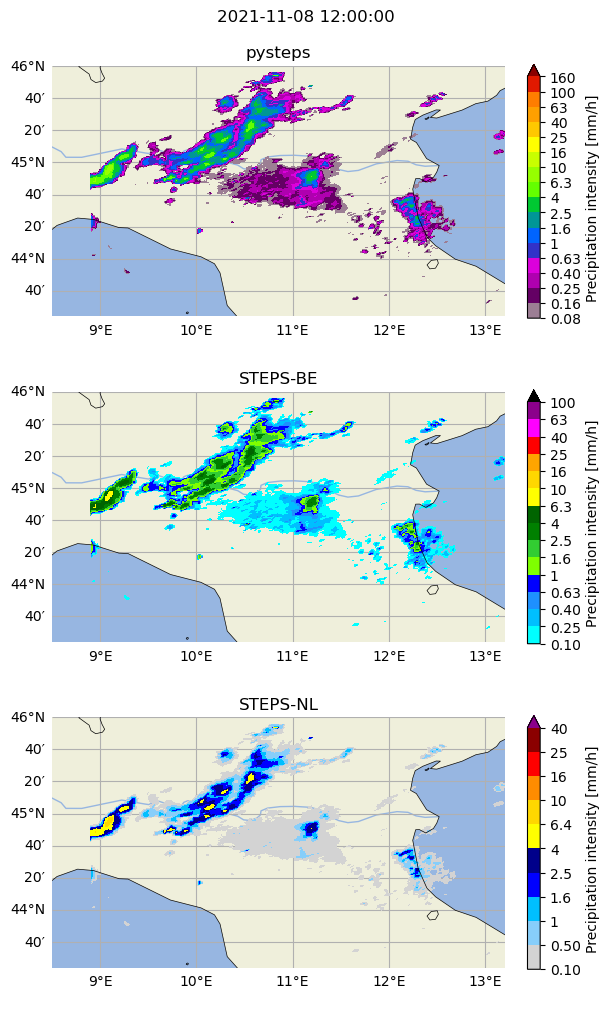

In [13]:
from pysteps.visualization import plot_precip_field
from matplotlib import pyplot as plt

# Disable warnings
import warnings
warnings.filterwarnings("ignore")

fig = plt.figure(figsize=(6, 10), layout="constrained")
# set the title to the timestamp of the last precipitation field
plt.suptitle(metadata["timestamps"][0])

map_kwargs = {"drawlonlatlines": True}

# plot the last precipitation field
# turn off axis, because it will be overwritten in plot_precip_field
ax = fig.add_subplot(311); ax.axis("off")
plot_precip_field(
    precip[0]*4,
    geodata=metadata,
    title="pysteps",
    colorscale="pysteps",
    map_kwargs=map_kwargs,
    units="mm/h",
); # the default colormap
ax = fig.add_subplot(312); ax.axis("off")
plot_precip_field(
    precip[0]*4,
    geodata=metadata,
    title="STEPS-BE",
    colorscale="STEPS-BE",
    map_kwargs=map_kwargs,
    units="mm/h",
    ax=ax,
);
ax = fig.add_subplot(313); ax.axis("off")
plot_precip_field(
    precip[0]*4,
    geodata=metadata,
    title="STEPS-NL",
    colorscale="STEPS-NL",
    map_kwargs=map_kwargs,
    units="mm/h",
    ax=ax,
);

Let's look at the distribution of the precipitation values.

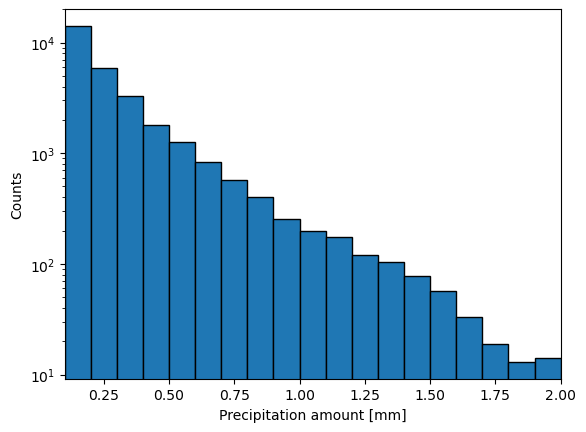

In [15]:
import numpy as np

# Use the last available composite and discard any invalid values
valid_precip_values = precip[~np.isnan(precip)]

bins = np.linspace(0.1, 2, 20)

plt.figure()
plt.hist(valid_precip_values, bins=bins, log=True, edgecolor='black')
plt.autoscale(tight=True, axis='x')
plt.xlabel("Precipitation amount [mm]")
plt.ylabel("Counts")
plt.show()

## Additional datasets and data processing

Next we load the FMI dataset that we will use in the following notebooks. Again, this time series contains 14 elements (i.e. 1 hour and 10 minutes). For computational reasons, we upsample the data by a factor of two, so that the spatial resolution will be 2 km instead of the original 1 km resolution. This is done by using [utils.dimension.aggregate_fields_space](https://pysteps.readthedocs.io/en/stable/generated/pysteps.utils.dimension.aggregate_fields_space.html#pysteps.utils.dimension.aggregate_fields_space). Note that the metadata is also updated so that the spatial extent of the composite does not change, only its spatial resolution.

Original shape: (14, 1226, 760)
Shape after upsampling: (14, 613, 380)
("Metadata FMI: {'projection': '+proj=stere  +lon_0=25E +lat_0=90N +lat_ts=60 "
 "+a=6371288 +x_0=380886.310 +y_0=3395677.920 +no_defs', 'x1': "
 "0.0049823258887045085, 'y1': 0.009731985162943602, 'x2': 759752.2852757066, "
 "'y2': 1225544.6588913496, 'cartesian_unit': 'm', 'xpixelsize': 1999.348106, "
 "'ypixelsize': 1999.25718, 'yorigin': 'upper', 'institution': 'Finnish "
 "Meteorological Institute', 'accutime': 5.0, 'unit': 'mm/h', 'transform': "
 "None, 'zerovalue': 0.0, 'threshold': np.float64(0.0002548805471873859), "
 "'zr_a': 223.0, 'zr_b': 1.53, 'timestamps': array([datetime.datetime(2016, 9, "
 '28, 14, 45),\n'
 '       datetime.datetime(2016, 9, 28, 14, 50),\n'
 '       datetime.datetime(2016, 9, 28, 14, 55),\n'
 '       datetime.datetime(2016, 9, 28, 15, 0),\n'
 '       datetime.datetime(2016, 9, 28, 15, 5),\n'
 '       datetime.datetime(2016, 9, 28, 15, 10),\n'
 '       datetime.datetime(2016, 9, 28, 

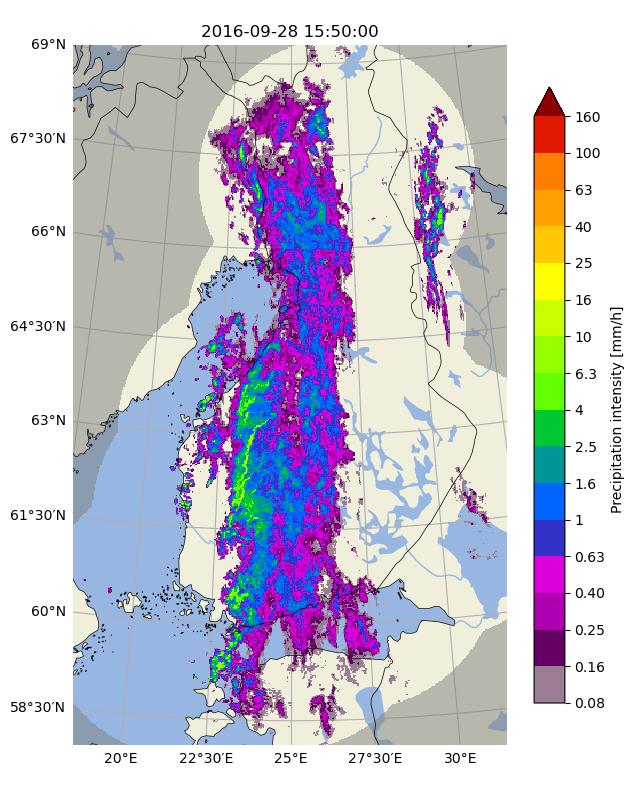

In [18]:
from pysteps.datasets import load_dataset
from pysteps.utils.dimension import aggregate_fields_space

fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot(111); ax.axis("off")

precip_fmi, metadata_fmi, timestep_fmi = load_dataset('fmi')
print(f"Original shape: {precip_fmi.shape}")

# Set the aggregation window to 2*pixel size (km) in the x- and y-directions
precip_fmi, metadata_fmi = aggregate_fields_space(
    precip_fmi,
    metadata_fmi,
    (2*metadata_fmi["xpixelsize"], 2*metadata_fmi["ypixelsize"])
)
print(f"Shape after upsampling: {precip_fmi.shape}")

pprint(f"Metadata FMI: {metadata_fmi}")

# Visualize the precipitation field
plot_precip_field(
    precip_fmi[-1],
    geodata=metadata_fmi,
    title=metadata_fmi["timestamps"][-1],
    map_kwargs=map_kwargs,
    ax=ax,
);

In addition, pysteps provides functionality for clipping a smaller subdomain from the original data. This can be done by using [dimension.clip_domain](https://pysteps.readthedocs.io/en/stable/generated/pysteps.utils.dimension.clip_domain.html#pysteps.utils.dimension.clip_domain). In this example, we pick southern Finland from the original radar composite. Again, the metadata is updated as well to reflect the clipped raster.

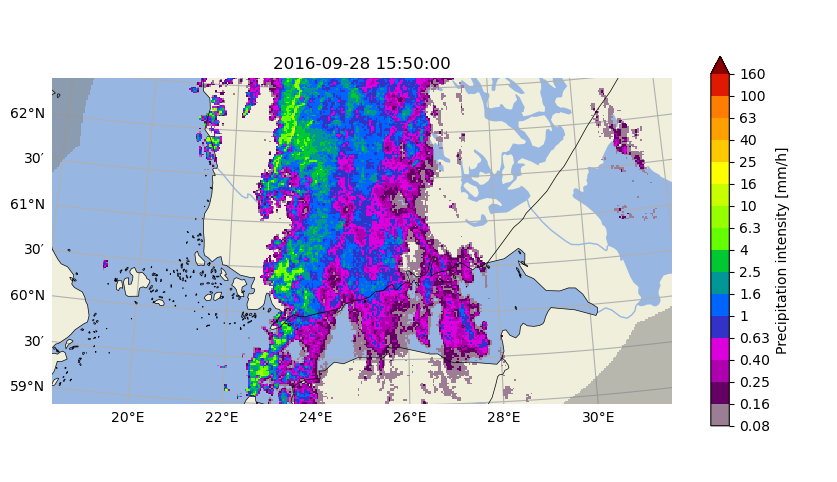

In [19]:
from pysteps.utils.dimension import clip_domain

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111); ax.axis("off")

# Set the new spatial extent in the Cartesian coordinates (meters)
precip_clipped, metadata_clipped = clip_domain(
    precip_fmi[-1],
    metadata_fmi,
    extent=(metadata_fmi["x1"], metadata_fmi["x2"], 100000, 500000)
)
plot_precip_field(
    precip_clipped,
    geodata=metadata_clipped,
    title=metadata_fmi["timestamps"][-1],
    map_kwargs=map_kwargs,
    ax=ax,
);

Let's then see what the distribution of the FMI rain rate values looks like.

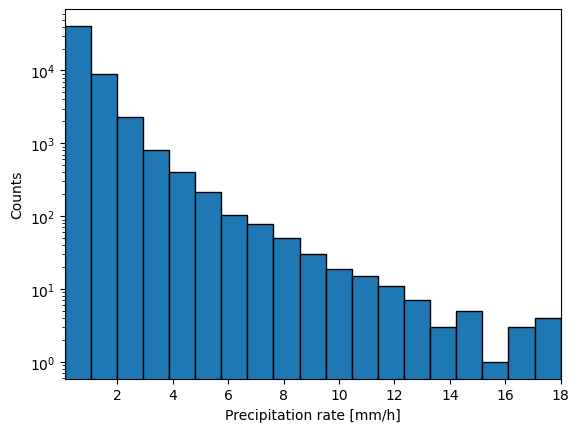

In [20]:
import numpy as np

# Use the last available composite and discard any invalid values
valid_precip_values = precip_fmi[-1][~np.isnan(precip_fmi[-1])]

bins = np.linspace(0.1, 18, 20)

plt.figure()
plt.hist(valid_precip_values, bins=bins, log=True, edgecolor='black')
plt.autoscale(tight=True, axis='x')
plt.xlabel("Precipitation rate [mm/h]")
plt.ylabel("Counts")
plt.show()

The histogram shows that precipitation rate values have a non-Gaussian and asymmetric distribution that is bounded at zero. Also, the probability of occurrence decays extremely fast with increasing precipitation rate values (note the logarithmic y-axis). This can cause issues when estimating the motion field or applying the nowcasting methods.

For the above reason, we can convert the precipitation rate values (in mm/h) to a more symmetric distribution by applying the following logarithmic transformation:

\begin{equation}
R\rightarrow
\begin{cases}
    10\log_{10}R, & \text{if } R\geq 0.1\text{mm h$^{-1}$} \\
    -15,          & \text{otherwise}
\end{cases}
\end{equation}

The transformed values correspond to logarithmic precipitation rates in units of dBR. The value of −15 dBR is equivalent to assigning a precipitation rate of approximately 0.03 mm h$^{−1}$ to the zeros. This can be done by using the `dB_transform` method in the [transformation](https://pysteps.readthedocs.io/en/stable/pysteps_reference/utils.html#pysteps-utils-transformation) module.

In [21]:
from pysteps.utils import transformation

# Log-transform the data to dBR with threshold of 0.1 mm/h and fill value of
# -15 dBR
precip_dbr, metadata_dbr = transformation.dB_transform(
    precip_fmi,
    metadata_fmi,
    threshold=0.1,
    zerovalue=-15.0
)

Let's again plot the distribution of the data after the transformation.

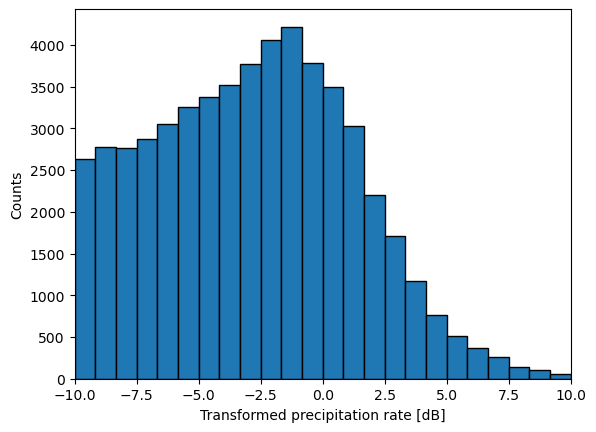

In [22]:
valid_precip_values = precip_dbr[-1][~np.isnan(precip_dbr[-1])]

bins = np.linspace(-10, 10, 25)

plt.figure()
plt.hist(valid_precip_values, bins=bins, edgecolor='black')
plt.autoscale(tight=True, axis='x')
plt.xlabel("Transformed precipitation rate [dB]")
plt.ylabel("Counts")
plt.show()

In principle, the above should resemble the normal distribution. However, the left side of the distribution is closer to uniform due to the low accuracy of radar observations in this range (i.e. low signal-to-noise ratio) and the limited numerical accuracy of the storage format of the FMI data. If we want to have normally distributed data, it's better to apply the normal quantile transformation [1].

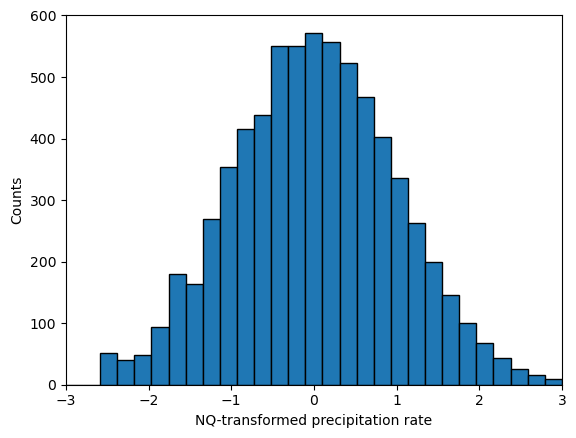

In [23]:
# Apply the normal quantile transformation.
# NOTE: It's essential that zero values are not included here. They skew the
# original distribution so that the transformated data is not normally
# distributed.
precip_nq, metadata_nq = transformation.NQ_transform(
    precip[-1][precip[-1] > 0],
    metadata,
)

valid_precip_values = precip_nq[np.logical_and(~np.isnan(precip_nq), np.abs(precip_nq) > 0)]

bins = np.linspace(-3, 3, 30)

plt.figure()
plt.hist(valid_precip_values, bins=bins, edgecolor='black')
plt.autoscale(tight=True, axis='x')
plt.xlabel("NQ-transformed precipitation rate")
plt.ylabel("Counts")
plt.show()

Finally, the following example shows how to transform the data to different units by using the [conversion](https://pysteps.readthedocs.io/en/stable/pysteps_reference/utils.html#pysteps-utils-conversion) module. Here we convert precipitation rate (mm/h) to reflectivity (dBZ) by using the `to_reflectivity` function and plot the result.

<GeoAxes: title={'center': '2016-09-28 15:50:00'}>

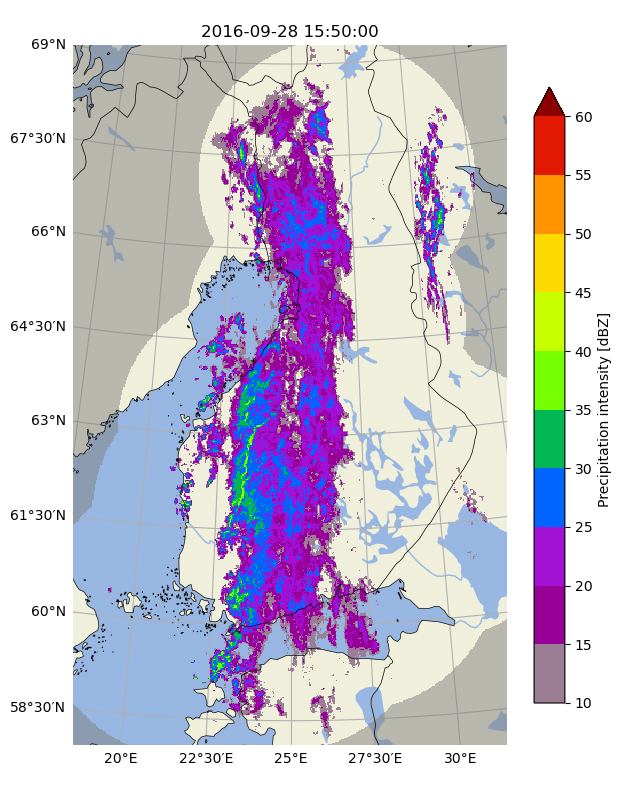

In [24]:
from pysteps.utils import conversion

fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot(111); ax.axis("off")

# Convert precipitation rate to reflectivity
precip_reflectivity, metadata_reflectivity = conversion.to_reflectivity(precip_fmi[-1], metadata_fmi)
# Plot the reflectivity field. Since the data is now in dBZ units, we need to
# explicitly specify this when calling plot_precip_field.
plot_precip_field(
    precip_reflectivity,
    geodata=metadata_reflectivity,
    title=metadata_fmi["timestamps"][-1],
    units="dBZ",
    map_kwargs=map_kwargs,
    ax=ax,
)


## References

[1] K. Bogner, F. Pappenberger and H. L. Cloke. Technical Note: The normal quantile transformation and its application in a flood forecasting system, Hydrol. Earth Syst. Sci., 16, 1085-1094, https://doi.org/10.5194/hess-16-1085-2012, 2012.